In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from math import sqrt

In [2]:
df1 = pd.read_csv('traincleanreduced.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,1,0,0,0,1,0,0,0,0,1,0.676386,9.808352,1
1,1,0,0,0,1,0,0,1,0,0,1.490084,9.662586,2
2,1,0,0,0,1,0,0,1,0,0,3.524327,9.613997,2
3,1,0,0,0,1,0,0,1,0,0,-0.095223,9.575126,5
4,0,1,0,0,1,0,0,1,0,0,0.802650,9.273877,3


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49913 entries, 0 to 49912
Data columns (total 13 columns):
0                   49913 non-null int64
1                   49913 non-null int64
2                   49913 non-null int64
3                   49913 non-null int64
4                   49913 non-null int64
5                   49913 non-null int64
6                   49913 non-null int64
7                   49913 non-null int64
8                   49913 non-null int64
9                   49913 non-null int64
loan_amount         49913 non-null float64
applicant_income    49913 non-null float64
rate_spread         49913 non-null int64
dtypes: float64(2), int64(11)
memory usage: 5.0 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000,49913.000000
mean,0.456394,0.528920,0.005610,0.009076,0.844509,0.154609,0.000882,0.730852,0.056779,0.212370,-0.016432,-0.023359,1.973093
std,0.498100,0.499168,0.074689,0.094835,0.362375,0.361535,0.029678,0.443522,0.231422,0.408989,0.812165,0.568300,1.585434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993096,-0.696515,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.537145,-0.317523,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.186413,-0.162040,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.255508,0.071186,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.907644,9.808352,8.000000


In [6]:
df1.shape

(49913, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(49913, 12)

In [11]:
y.shape

(49913,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(39930, 12)

In [14]:
X_test.shape

(9983, 12)

### Create LGBM Training Dataset

In [15]:
trainingdata = lgb.Dataset(data=X, label=y)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = ['mean_absolute_error','mean_squared_error','root_mean_squared_error']
params['sub_feature'] = 0.5
params['num_leaves'] = 70
params['min_data'] = 50
params['max_depth'] = 10

model = lgb.train(params=params,train_set=trainingdata,num_boost_round=10000)

In [16]:
y_predict = model.predict(X_test)

In [17]:
y_predict

array([1.28074517, 1.97076513, 1.75587652, ..., 1.22220304, 1.18034139,
       1.38744858])

In [18]:
y_predict.shape

(9983,)

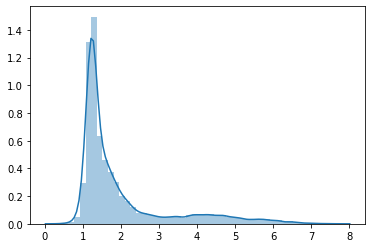

In [19]:
sns.distplot(y_predict)
plt.show()

In [20]:
MSE = mean_squared_error(y_test,y_predict)
print("Mean Squared Error is", MSE)

Mean Squared Error is 0.8107820647765822


In [21]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 0.900


In [22]:
MAE = mean_absolute_error(y_test,y_predict)
print("MAE is", MAE)

MAE is 0.6244220793810416


In [23]:
r2 = r2_score(y_test,y_predict)
print("R2 score is", r2)

R2 score is 0.6716808853826506
